<a href="https://colab.research.google.com/github/PavloZakala/CNN/blob/main/CNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

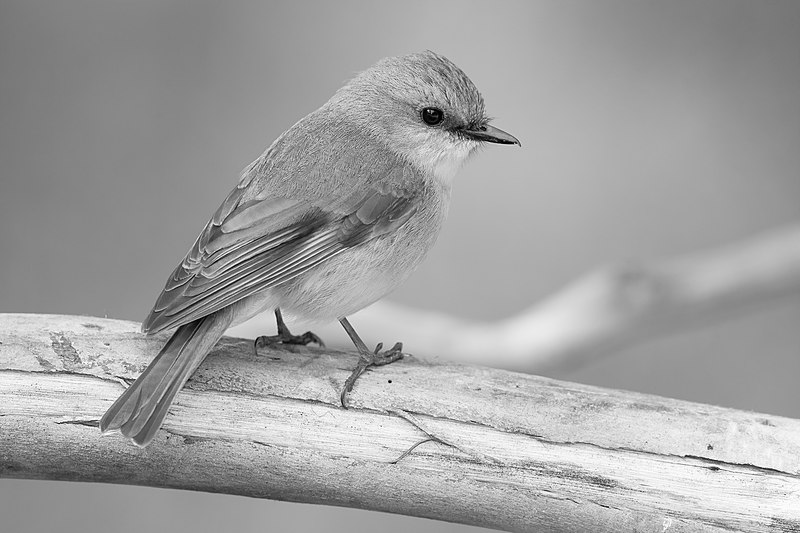

In [8]:
import requests
from PIL import Image, ImageOps
import numpy as np

url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Eopsaltria_australis_-_Mogo_Campground.jpg/800px-Eopsaltria_australis_-_Mogo_Campground.jpg'

data = requests.get(url).content
f = open('bird.jpg','wb')

f.write(data)
f.close()

bird_color = Image.open('bird.jpg')
bird_gray = ImageOps.grayscale(bird_color)

bird_gray

# Типи згорткових шарів

## Класичний згортковий шар

<img src="https://miro.medium.com/v2/resize:fit:1400/format:webp/1*Fw-ehcNBR9byHtho-Rxbtw.gif" alt="drawing" width="500"/>


https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [9]:
import torch
from torch import nn

from matplotlib import pyplot as plt

def show_torch_array(img, channel=0):
    plt.imshow(img[0, :, :].numpy())

    c, h, w = img.shape
    for i in range(w):
        for j in range(h):
            plt.text(j, i, f"{float(img[channel, i, j]):.2f}", ha="center", va="center", color="w", fontsize=7)
    plt.show()

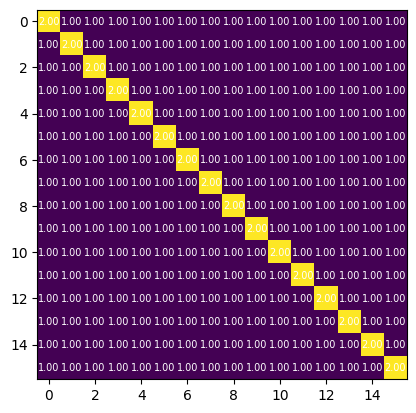

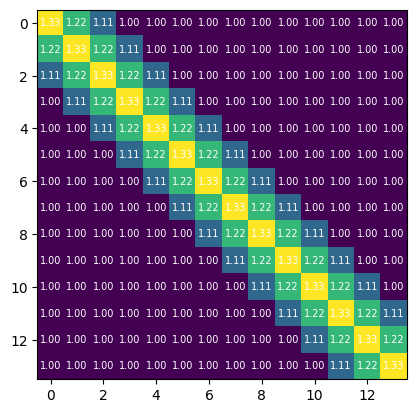

In [10]:
in_channels = 1
out_channels = 1
kernel_size = 3
stride = 1
padding = 0

conv_layer = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, bias=False)
conv_layer.weight.requires_grad = False
conv_layer.weight.data.fill_(1/9)

ones_image = torch.ones(1, 16, 16) + torch.eye(16)
show_torch_array(ones_image)

out = conv_layer(ones_image)
show_torch_array(out)


array([[[121.82289 , 122.23777 , 122.63005 , ..., 119.67136 ,
         119.39472 , 119.08858 ],
        [121.68686 , 122.09717 , 122.498505, ..., 119.725746,
         119.44004 , 119.106674],
        [121.587105, 121.990585, 122.39645 , ..., 119.77786 ,
         119.48083 , 119.12707 ],
        ...,
        [138.41519 , 138.53531 , 138.68037 , ..., 201.46936 ,
         202.03622 , 203.21538 ],
        [138.33353 , 138.47864 , 138.63731 , ..., 192.58727 ,
         192.46477 , 192.9886  ],
        [138.25882 , 138.42203 , 138.59656 , ..., 185.06801 ,
         184.65527 , 184.86845 ]]], dtype=float32)

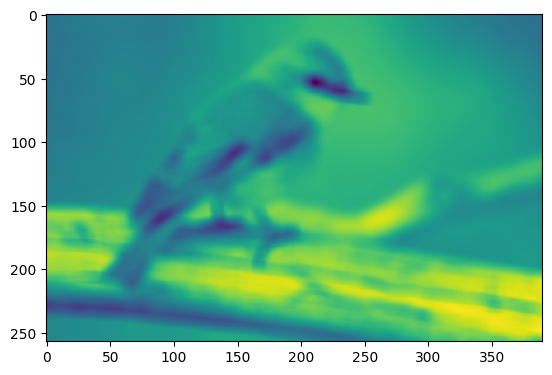

In [11]:
stride = 2
padding = 0

conv_layer = nn.Conv2d(in_channels, out_channels, kernel_size=21, stride=stride, padding=padding, bias=False)
conv_layer.weight.requires_grad = False
conv_layer.weight.data.fill_(1 / 441)

input_img = np.array(bird_gray).astype(float)
out = conv_layer(torch.asarray(input_img, dtype=torch.float32).unsqueeze(0))

plt.imshow(out.numpy()[0])
out.numpy()

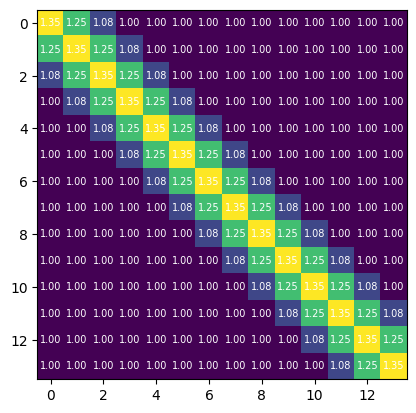

In [12]:
import numpy as np

def gausian_kernel(size, sigma=1):
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g / g.sum()

conv_layer = nn.Conv2d(1, 1, 3, 1, 0, bias=False)
conv_layer.weight.requires_grad = False
conv_layer.weight.data = torch.asarray(gausian_kernel(3, 1), dtype=torch.float32).reshape(1, 1, 3, 3)

out = conv_layer(ones_image)
show_torch_array(out)

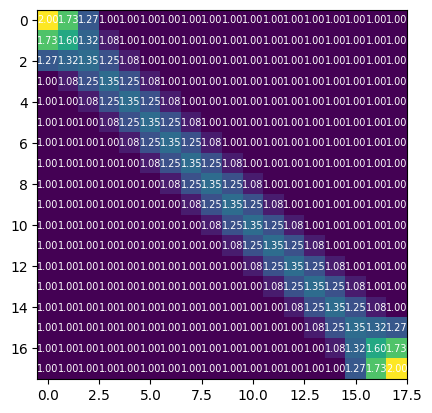

In [13]:
conv_layer = nn.Conv2d(1, 1, 3, 1, 2, bias=False, padding_mode="replicate")
conv_layer.weight.requires_grad = False
conv_layer.weight.data = torch.asarray(gausian_kernel(3, 1), dtype=torch.float32).reshape(1, 1, 3, 3)

out = conv_layer(ones_image)
show_torch_array(out)

torch.Size([1, 1, 1, 1])


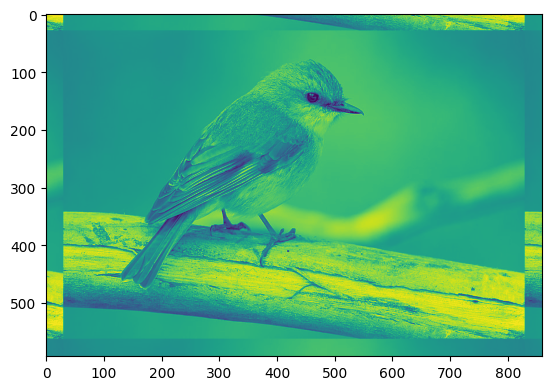

In [14]:
conv_layer = nn.Conv2d(1, 1, 1, 1, 30, bias=False, padding_mode="circular")
conv_layer.weight.requires_grad = False
print(conv_layer.weight.data.shape)

conv_layer.weight.data = torch.asarray([[1.0]], dtype=torch.float32).unsqueeze(0).unsqueeze(0)

out = conv_layer(torch.asarray(input_img, dtype=torch.float32).unsqueeze(0))
plt.imshow(out.numpy()[0])

# 16x 16 -> 14x14
#               + ->
# -> 14x14

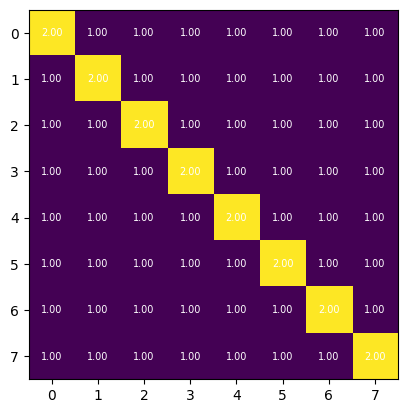

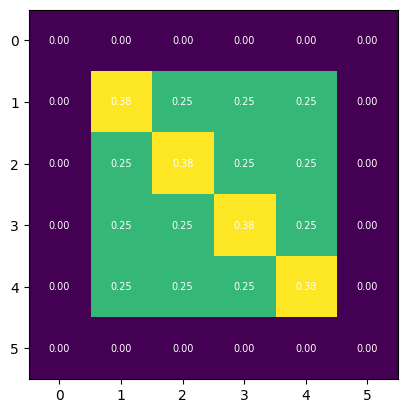

In [15]:
conv_layer = nn.Conv2d(1, 1, 2, 2, 2, bias=False)
conv_layer.weight.requires_grad = False
conv_layer.weight.data.fill_(1/16) # = torch.asarray(gausian_kernel(3, 1), dtype=torch.float32).reshape(1, 1, 3, 3)

ones_image = torch.ones(1, 8, 8) + torch.eye(8)
show_torch_array(ones_image)

out = conv_layer(ones_image)
show_torch_array(out)

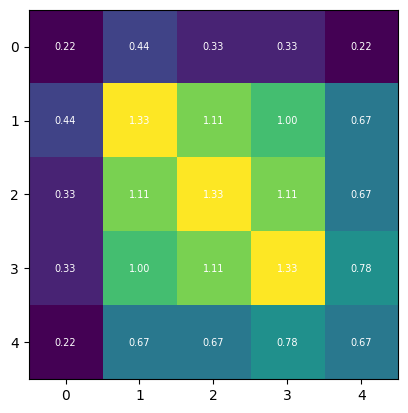

In [16]:
conv_layer = nn.Conv2d(1, 1, 3, 2, 2, bias=False)
conv_layer.weight.requires_grad = False
conv_layer.weight.data.fill_(1/9)

out = conv_layer(ones_image)
show_torch_array(out)

torch.Size([3, 1, 3, 3])


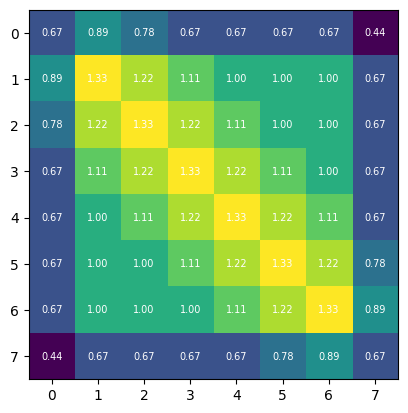

In [17]:
conv_layer = nn.Conv2d(1, 3, 3, 1, 1, bias=False)
conv_layer.weight.requires_grad = False
print(conv_layer.weight.data.shape)
conv_layer.weight.data.fill_(1/9)

out = conv_layer(ones_image)
show_torch_array(out)

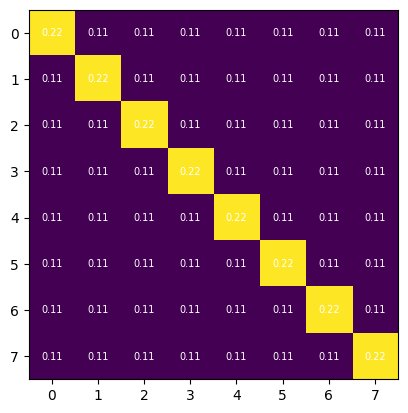

In [18]:
# 1x1 Convolution
conv_layer = nn.Conv2d(1, 3, 1, 1, 0, bias=False)
conv_layer.weight.requires_grad = False
conv_layer.weight.data.fill_(1/9)

out = conv_layer(ones_image)
show_torch_array(out)

# Завдання

Зібрати з блоків шар ResNeXt
https://arxiv.org/pdf/1611.05431 - ДЗ

In [19]:
import torch
import torch.nn as nn

class ResNetXBlock(nn.Module):
    def __init__(self, in_channels=256, out_channels=256, num_paths=32):
        super(ResNetXBlock, self).__init__()
        self.num_paths = num_paths

        self.paths = nn.ModuleList([
            nn.Sequential(
                nn.Conv2d(in_channels, 4, kernel_size=1, stride=1),
                nn.ReLU(),
                nn.Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
                nn.ReLU(),
                nn.Conv2d(4, out_channels, kernel_size=1, stride=1),
                nn.ReLU(),
            ) for _ in range(num_paths)
        ])

        self.relu = nn.ReLU()

    def forward(self, x):
        identity = x

        out = sum(path(x) for path in self.paths)

        out += identity
        out = self.relu(out)
        return out

# Example usage
input_tensor = torch.ones(1, 256, 32, 32)

res_block = ResNetXBlock()

# use the block
output_tensor = res_block(input_tensor)
output_tensor.shape

torch.Size([1, 256, 32, 32])

# Pooling layers

https://pytorch.org/docs/stable/nn.html#pooling-layers



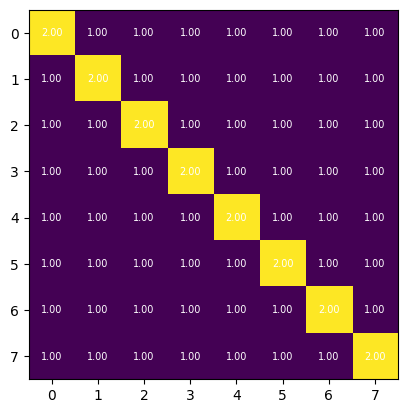

In [20]:
max_pool = nn.MaxPool2d(2, stride=2, padding=0)

ones_image = torch.ones(1, 16, 16) + torch.eye(16)

out = max_pool(ones_image)
show_torch_array(out)

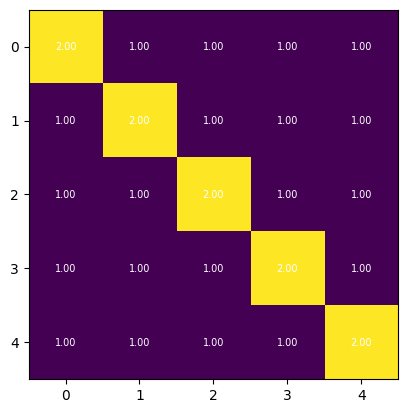

In [21]:
max_pool = nn.MaxPool2d(3, 3, 0)

out = max_pool(ones_image)
show_torch_array(out)

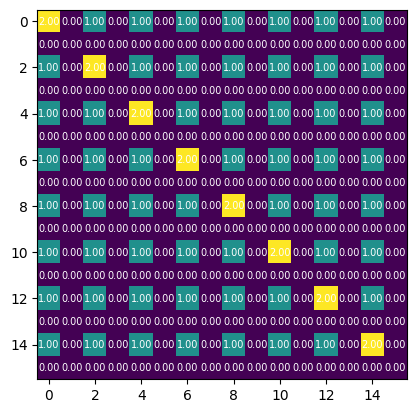

In [22]:
pool = nn.MaxPool2d(2, stride=2, return_indices=True)
unpool = nn.MaxUnpool2d(2, stride=2)

output, indices = pool(ones_image)
out = unpool(output, indices)

show_torch_array(out)

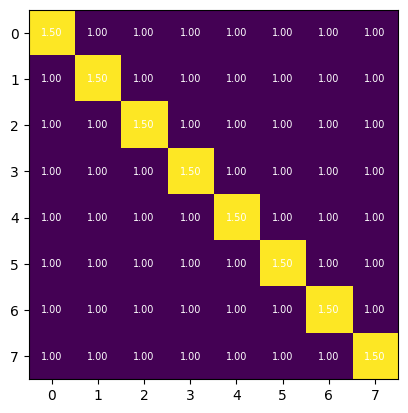

In [23]:
avg_pool = nn.AvgPool2d(2, 2, 0)

out = avg_pool(ones_image)
show_torch_array(out)

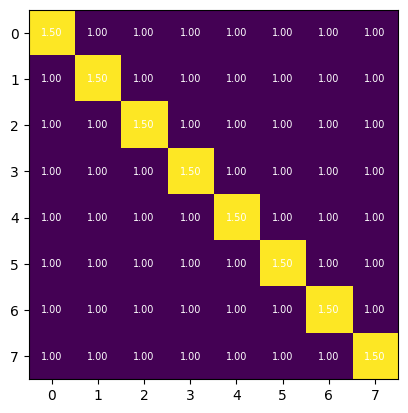

In [24]:
# Як зібрати AvgPool2d з допомогою Conv2d?

conv_layer = nn.Conv2d(1, 1, 2, 2, 0, bias=False)
conv_layer.weight.requires_grad = False
conv_layer.weight.data.fill_(1/4)

out = avg_pool(ones_image)
show_torch_array(out)